In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

### Data Understanding

In [3]:
df.shape

(48895, 16)

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Data Preparation

In [8]:
df = df[['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 
         #'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].copy()

In [9]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

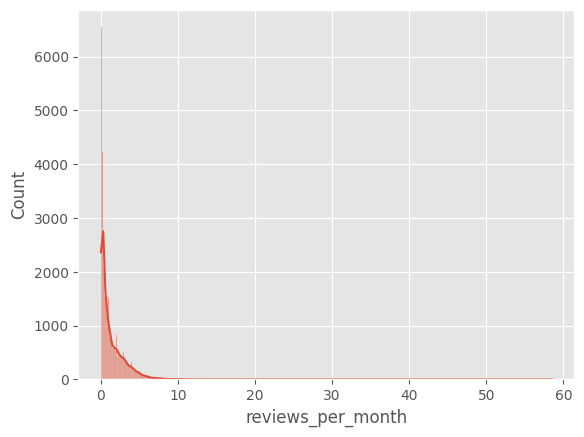

In [10]:
# checking if it is normal distribution
sns.histplot(data=df, x=df["reviews_per_month"], kde=True)
plt.show()

In [11]:
from scipy.stats import skew
df['reviews_per_month'].skew()

3.13018853561771

In [12]:
# iqr method
q1 = df.reviews_per_month.quantile(0.25)
q3 = df.reviews_per_month.quantile(0.75)

iqr = q3-q1
iqr

1.83

In [13]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
df[(df.reviews_per_month<lower) | (df.reviews_per_month>upper)][['reviews_per_month']].head()

,reviews_per_month
471,6.70
534,6.62
553,7.14
1103,5.27
1125,5.12


In [14]:
df_iqr_transformed = df[(df.reviews_per_month>lower) & (df.reviews_per_month<upper)]

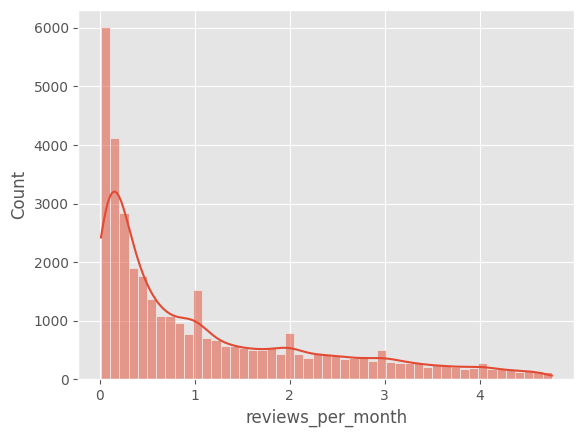

In [15]:
sns.histplot(data=df_iqr_transformed, x=df_iqr_transformed['reviews_per_month'], kde=True)
plt.show()

In [16]:
df_log_transformed = df.copy()

In [17]:
# log transformation
df_log_transformed.loc[:, 'log_reviews_per_month'] = np.log(df_log_transformed['reviews_per_month'])

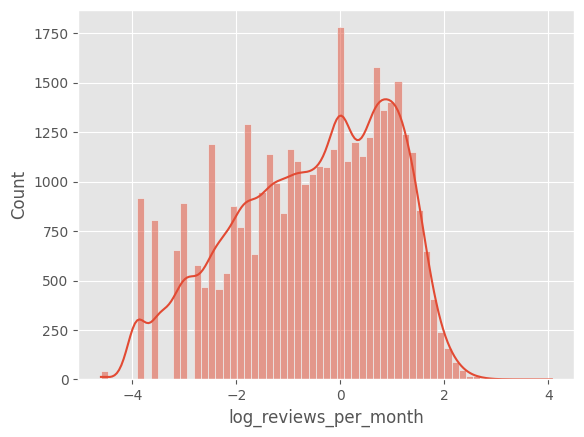

In [18]:
sns.histplot(data=df_log_transformed, x=df_log_transformed['log_reviews_per_month'], kde=True)
plt.show()

In [19]:
df_zscore_transformed = df.copy()

In [20]:
# Z-score method
# calculate mean, std deviation, +3σ, -3σ
m = df_zscore_transformed.reviews_per_month.mean()
s = df_zscore_transformed.reviews_per_month.std()
lower = m-3*s
upper = m+3*s

In [21]:
df_zscore_transformed["ZScore"] = (df_zscore_transformed.reviews_per_month - m)/s

In [22]:
# outliers
df_zscore_transformed[(df_zscore_transformed.ZScore<-3) | (df_zscore_transformed.ZScore>3)][['reviews_per_month']].head()

,reviews_per_month
471,6.70
534,6.62
553,7.14
1614,10.00
1627,10.00


In [23]:
# find out the datapoints omitting outliers
df_zscore_transformed = df[(df.reviews_per_month>lower) & (df.reviews_per_month<upper)]

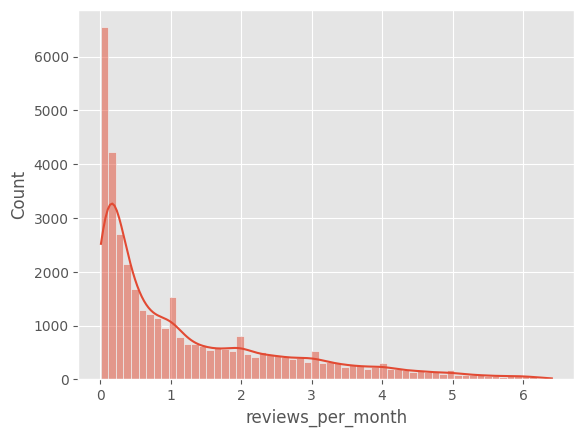

In [24]:
# plot histogram to check if it is in normal distribution
sns.histplot(data=df_zscore_transformed, x=df_zscore_transformed["reviews_per_month"], kde=True)
plt.show()

In [25]:
print("Skewness (Origininal): ", df['reviews_per_month'].skew())
print("Skewness (Log Transformed): ", df_log_transformed['log_reviews_per_month'].skew())
print("Skewness (IQR Transformed): ", df_iqr_transformed['reviews_per_month'].skew())
print("Skewness (Z-Score Transformed): ", df_zscore_transformed['reviews_per_month'].skew())

Skewness (Origininal):  3.13018853561771
Skewness (Log Transformed):  -0.39692134207938956
Skewness (IQR Transformed):  1.1777926200872912
Skewness (Z-Score Transformed):  1.3634540896469478


In [26]:
#still highly skewed; so, instead of considering it as continuous variable, transforming it to categorical variable
# Create a new column and initialize it with NaN values
df['reviews_per_month_category'] = pd.NA

# Assign categories based on quartile limits
df.loc[df['reviews_per_month'] <= q1, 'reviews_per_month_category'] = 'Low Activity'
df.loc[(df['reviews_per_month'] > q1) & (df['reviews_per_month'] <= q3), 'reviews_per_month_category'] = 'Moderate Activity'
df.loc[df['reviews_per_month'] > q3, 'reviews_per_month_category'] = 'High Activity'

df[['reviews_per_month_category']].head()

,reviews_per_month_category
0,Moderate Activity
1,Moderate Activity
2,<NA>
3,High Activity
4,Low Activity


In [27]:
mode = df['reviews_per_month_category'].mode().iloc[0]
mode

'Moderate Activity'

In [28]:
# Fill null values with mode
df['reviews_per_month_category'].fillna(mode, inplace=True)

In [29]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
reviews_per_month_category            0
dtype: int64

In [30]:
df.loc[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_category


In [31]:
df['id'].nunique()

48895

### Feature Understanding

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Moderate Activity
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Moderate Activity
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,Moderate Activity
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High Activity
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low Activity


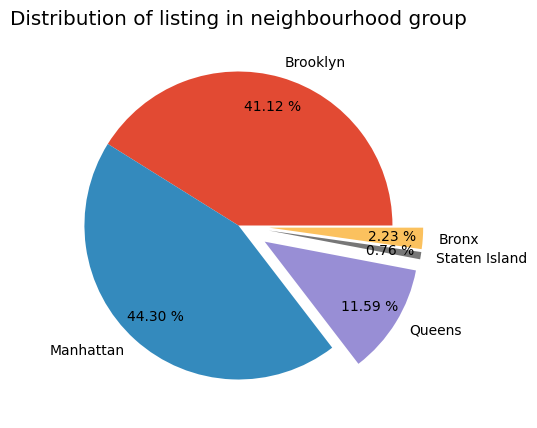

In [33]:

plt.figure(figsize=(8,5), dpi=100)

neighbourhood_group = df['neighbourhood_group'].unique()

count_of_listings = []

for i in neighbourhood_group:
    count_of_listings.append(
        df.loc[df['neighbourhood_group'] == i, 
               'neighbourhood_group'].value_counts().iloc[0])

plt.title('Distribution of listing in neighbourhood group')

explode = (0,0,.2,.2,.2)
plt.pie(count_of_listings, labels=neighbourhood_group, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

Text(0, 0.5, 'Count')

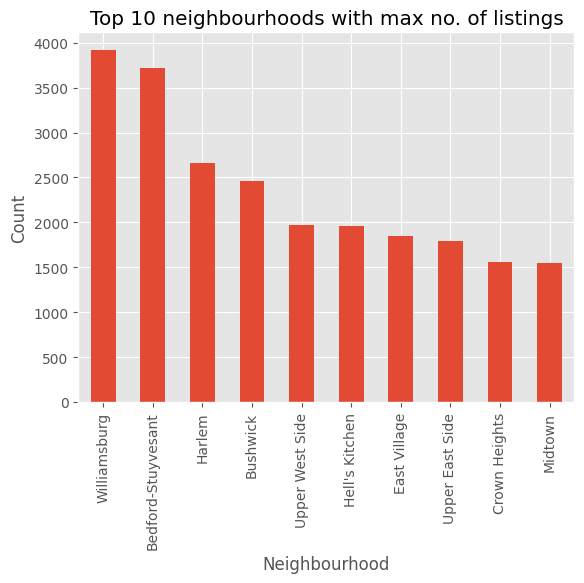

In [34]:
ax = df['neighbourhood'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 neighbourhoods with max no. of listings')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')

In [35]:
top_neighbourhoods = df['neighbourhood'].value_counts().head(10).index.tolist()

df_top_neighbourhoods = df.loc[df['neighbourhood'].isin(top_neighbourhoods)]

# Group the data by 'neighbourhood' and 'neighbourhood_group' and calculate the count
listings_counts = df_top_neighbourhoods.groupby(
    ['neighbourhood', 'neighbourhood_group']).size().reset_index(name='count')

listings_counts.sort_values(by='count', ascending=False, inplace=True)

listings_counts

,neighbourhood,neighbourhood_group,count
9,Williamsburg,Brooklyn,3920
0,Bedford-Stuyvesant,Brooklyn,3714
4,Harlem,Manhattan,2658
1,Bushwick,Brooklyn,2465
8,Upper West Side,Manhattan,1971
5,Hell's Kitchen,Manhattan,1958
3,East Village,Manhattan,1853
7,Upper East Side,Manhattan,1798
2,Crown Heights,Brooklyn,1564
6,Midtown,Manhattan,1545


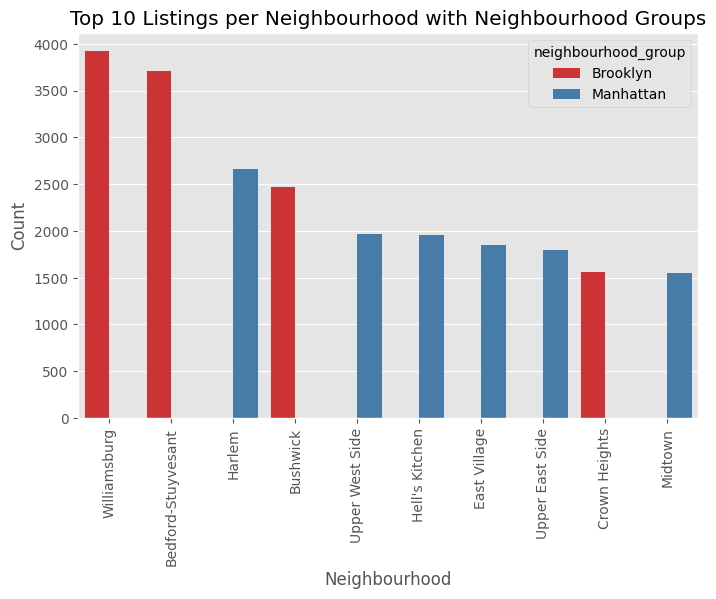

In [36]:
plt.figure(figsize=(8, 5), dpi=100)
sns.barplot(x="neighbourhood", 
            y="count", 
            hue="neighbourhood_group", 
            data=listings_counts,
            palette='Set1')

plt.xlabel("Neighbourhood")
plt.ylabel("Count")
plt.title("Top 10 Listings per Neighbourhood with Neighbourhood Groups")
plt.xticks(rotation=90)

plt.show()

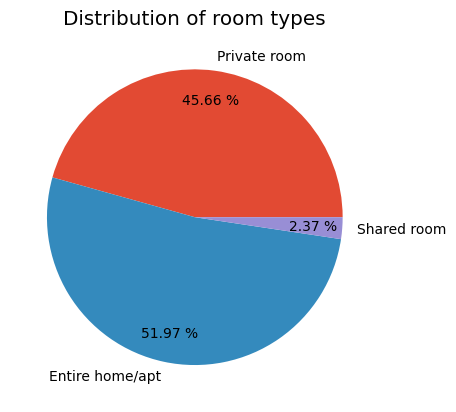

In [37]:
room_types = df['room_type'].unique()

no_of_listings = []
for i in room_types:
    no_of_listings.append(
    df.loc[df['room_type'] == i,
          'room_type'].value_counts().iloc[0])
    

plt.title('Distribution of room types')

plt.pie(no_of_listings, labels=room_types, pctdistance=0.8,autopct='%.2f %%')
plt.show()

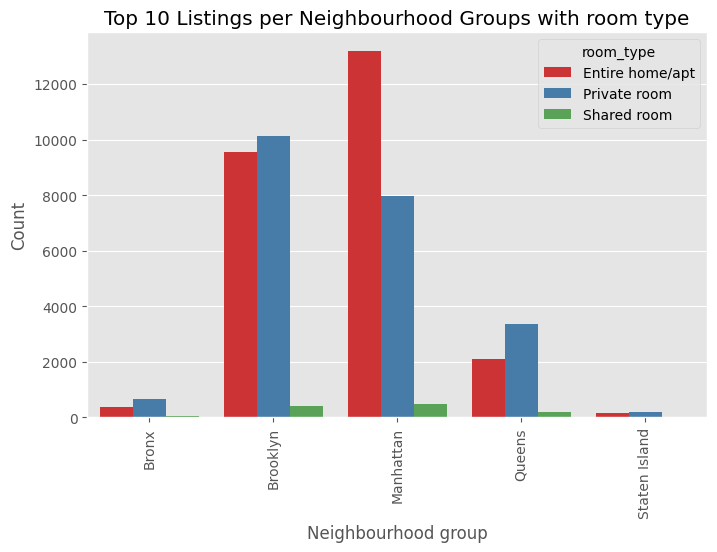

In [38]:
# Group the data by 'neighbourhood_group' and 'room_type' and calculate the count
df_listings_counts = df.groupby(
    ['neighbourhood_group', 'room_type']).size().reset_index(name='count')

plt.figure(figsize=(8, 5), dpi=100)
sns.barplot(x="neighbourhood_group", 
            y='count', 
            hue="room_type", 
            data=df_listings_counts,
            palette='Set1')

plt.xlabel("Neighbourhood group")
plt.ylabel("Count")
plt.title("Top 10 Listings per Neighbourhood Groups with room type")
plt.xticks(rotation=90)

plt.show()

Text(0.5, 0, 'Price')

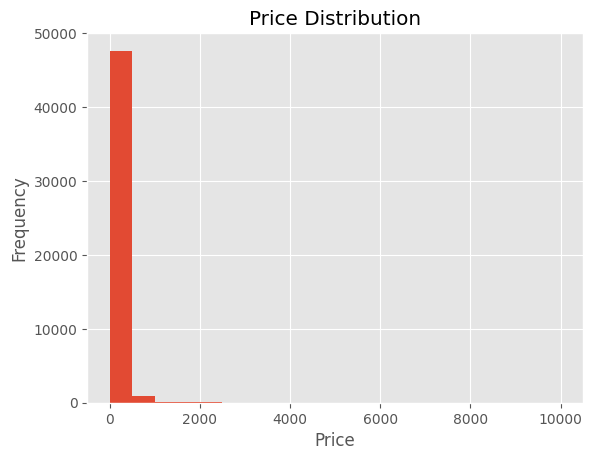

In [39]:
ax = df['price'].plot(kind='hist', 
                          bins=20, 
                          title='Price Distribution')
ax.set_xlabel('Price')


In [40]:
df['price'].skew()

19.118938995046033

In [41]:
# iqr method
q1 = df.price.quantile(0.25)
q3 = df.price.quantile(0.75)

iqr = q3-q1
iqr

106.0

In [42]:
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

# outliers
df[(df.price<lower) | (df.price>upper)][['price']].head()

,price
61,375
85,800
103,500
114,350
121,400


In [43]:
df_iqr_transformed = df[(df.price>lower) & (df.price<upper)]

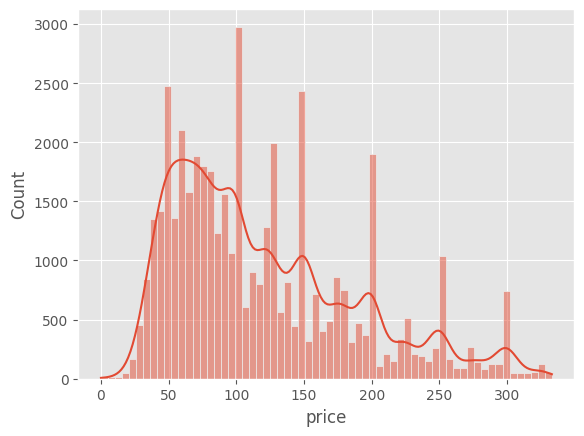

In [44]:
sns.histplot(data=df_iqr_transformed, x=df_iqr_transformed['price'], kde=True)
plt.show()

In [45]:
# Z-score method
# calculate mean, std deviation, +3σ, -3σ
m = df_zscore_transformed.price.mean()
s = df_zscore_transformed.price.std()
lower = m-3*s
upper = m+3*s

In [46]:
df_zscore_transformed["ZScore_price"] = (df_zscore_transformed.price - m)/s

C:\Users\user\AppData\Local\Temp\ipykernel_18032\2641431394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zscore_transformed["ZScore_price"] = (df_zscore_transformed.price - m)/s


In [47]:
# find out the datapoints omitting outliers
df_zscore_transformed = df[(df.price>lower) & (df.price<upper)]

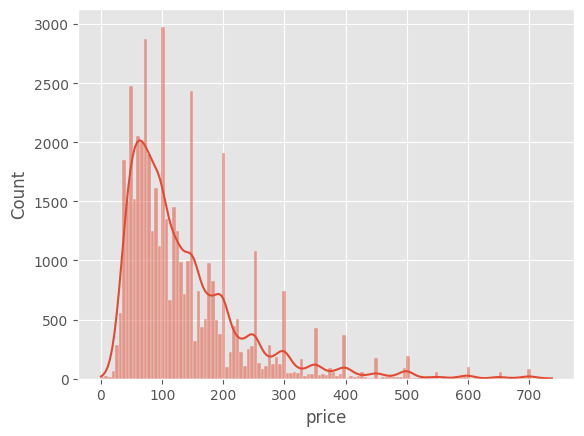

In [48]:
# plot histogram to check if it is in normal distribution
sns.histplot(data=df_zscore_transformed, x=df_zscore_transformed["price"], kde=True)
plt.show()

### Log Transformation with Shift

In [154]:
df_log_transform = df.copy()

constant = 0.01
df_log_transform['price_log'] = np.log(df_log_transform['price'] + constant)

df_log_transform[['price', 'price_log']].head()

,price,price_log
0,149,5.004013
1,225,5.416145
2,150,5.010702
3,89,4.488749
4,80,4.382152


In [155]:
df_log_transform[['price', 'price_log']].describe()

,price,price_log
count,48895.000000,48895.000000
mean,152.720687,4.725041
std,240.154170,0.711973
min,0.000000,-4.605170
25%,69.000000,4.234251
50%,106.000000,4.663533
75%,175.000000,5.164843
max,10000.000000,9.210341


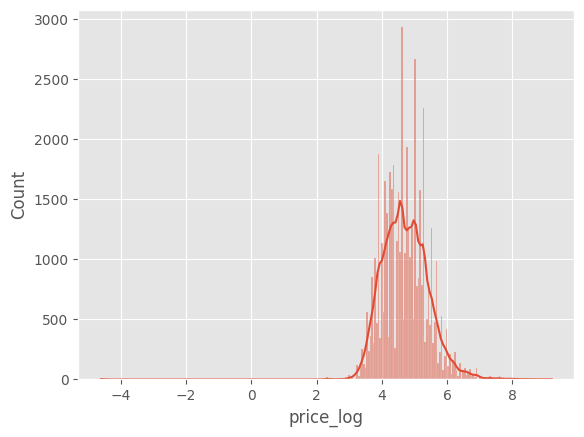

In [157]:
sns.histplot(data=df_log_transform, x=df_log_transform['price_log'], kde=True)
plt.show()

In [159]:
df_boxcox_transformed = df.copy()

In [53]:
from scipy import stats

# Find the optimal lambda for Box-Cox transformation
transformed_price, lambda_value = stats.boxcox(df_boxcox_transformed['price']+constant)
print("Optimal lambda:", lambda_value)

Optimal lambda: -0.008673081345938978


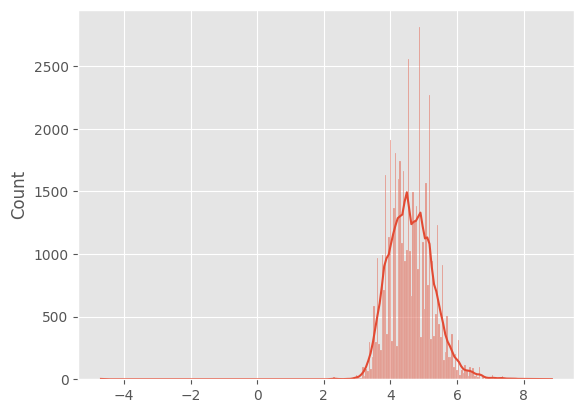

In [54]:
sns.histplot(data=df_boxcox_transformed, x=transformed_price, kde=True)
plt.show()

In [171]:
df_iqr_transformed.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Moderate Activity
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Moderate Activity
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,Moderate Activity
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,High Activity
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Low Activity


In [172]:
top_hosts_with_max_listings = df_iqr_transformed.loc[~df_iqr_transformed.duplicated(subset=['host_id'])] \
                                .sort_values(by='calculated_host_listings_count', ascending=False)['host_id'] \
                                .head(10) \
                                .tolist()

df_listings_by_TopHosts = df_iqr_transformed.loc[df['host_id'].isin(top_hosts_with_max_listings)]

# Group the data by 'host_id' and calculate the average of price
df_listings1 = df_listings_by_TopHosts.groupby(['host_id', 'calculated_host_listings_count'])['price'] \
                    .mean().reset_index(name='Average_price')

df_listings1

,host_id,calculated_host_listings_count,Average_price
0,7503643,52,149.192308
1,12243051,96,211.305263
2,16098958,96,195.111111
3,22541573,87,215.436782
4,30283594,121,219.842105
5,61391963,91,146.241758
6,107434423,232,279.255682
7,137358866,103,43.825243
8,200380610,65,223.534884
9,219517861,327,206.492647


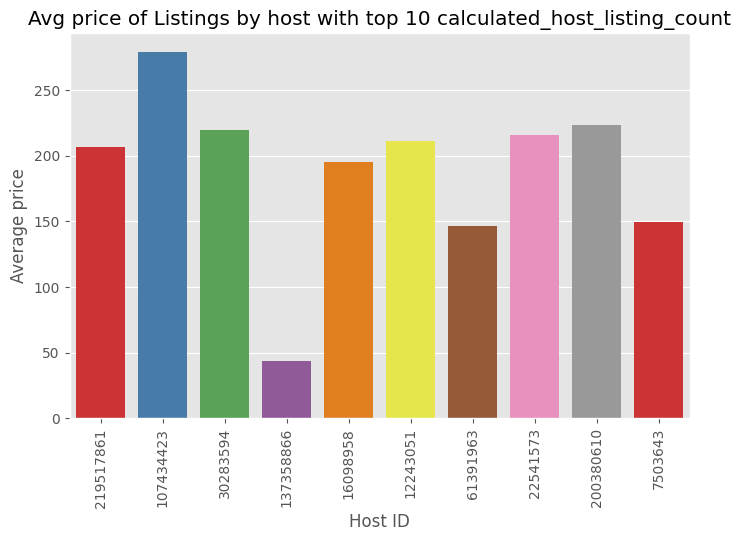

In [173]:
plt.figure(figsize=(8, 5), dpi=100)
sns.barplot(x="host_id", 
            y="Average_price",  
            data=df_listings1,
            palette='Set1',
            order=top_hosts_with_max_listings)

plt.xlabel("Host ID")
plt.ylabel("Average price")
plt.title("Avg price of Listings by host with top 10 calculated_host_listing_count")
plt.xticks(rotation=90)

plt.show()

In [174]:
## Group the data by 'host_id' and calculate the average of price
df_listings_by_Hosts = df.groupby(['host_id', 
                                   'neighbourhood_group', 
                                   'calculated_host_listings_count'])['price'] \
                    .mean().reset_index(name='Average_price')

df_listings_by_Hosts.head()

,host_id,neighbourhood_group,calculated_host_listings_count,Average_price
0,2438,Brooklyn,1,95.000000
1,2571,Brooklyn,1,182.000000
2,2787,Brooklyn,6,100.666667
3,2845,Manhattan,2,162.000000
4,2868,Brooklyn,1,60.000000


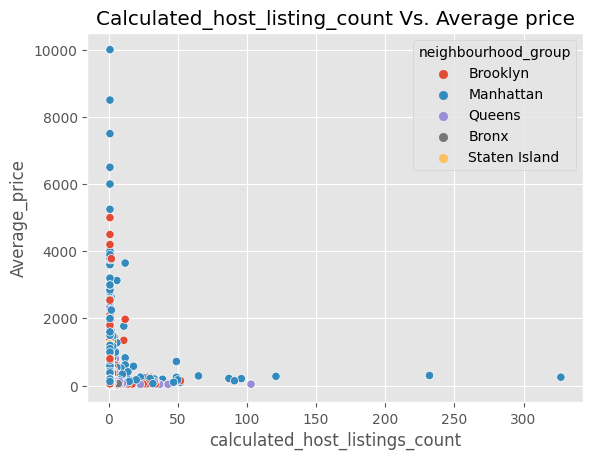

In [87]:
# all original data
ax = sns.scatterplot(x='calculated_host_listings_count', 
                y='Average_price',
                hue='neighbourhood_group',
                data=df_listings_by_Hosts)
ax.set_title("Calculated_host_listing_count Vs. Average price")
plt.show()

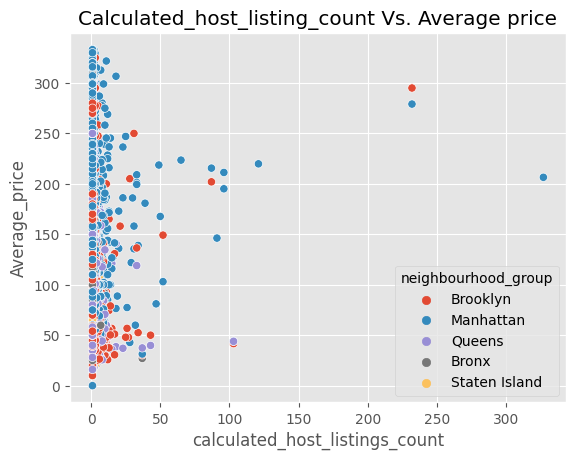

In [166]:
# data without outliers
df_listings_by_Hosts_IQR = df_iqr_transformed.groupby(['host_id', 
                                   'neighbourhood_group', 
                                   'calculated_host_listings_count'])['price'] \
                    .mean().reset_index(name='Average_price')

df_listings_by_Hosts_IQR.head()

ax = sns.scatterplot(x='calculated_host_listings_count', 
                y='Average_price',
                hue='neighbourhood_group',
                data=df_listings_by_Hosts_IQR)
ax.set_title("Calculated_host_listing_count Vs. Average price")
plt.show()

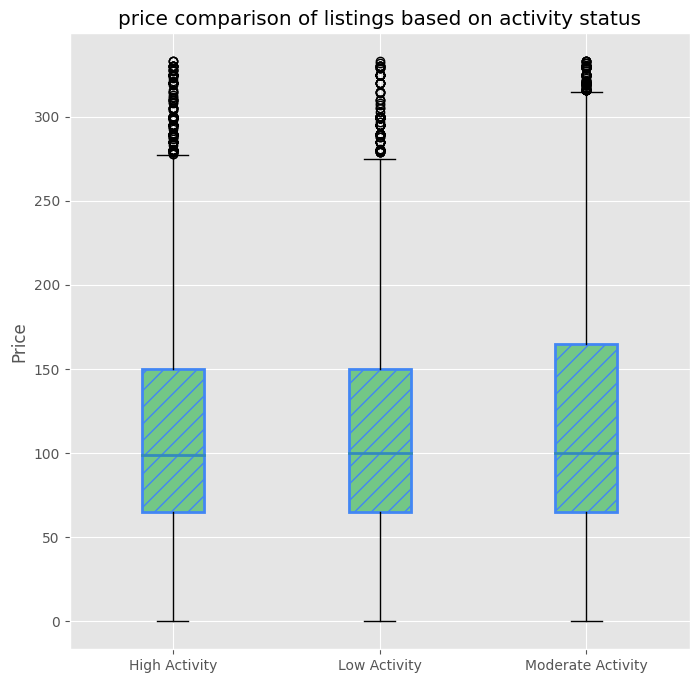

In [167]:
plt.figure(figsize=(8,8), dpi=100)

high = df_iqr_transformed.loc[df_iqr_transformed.reviews_per_month_category == "High Activity"]['price']
low = df_iqr_transformed.loc[df_iqr_transformed.reviews_per_month_category == "Low Activity"]['price']
moderate = df_iqr_transformed.loc[df_iqr_transformed.reviews_per_month_category == "Moderate Activity"]['price']
labels = ["High Activity", "Low Activity", "Moderate Activity"]

bp = plt.boxplot([high, low, moderate], labels= labels, patch_artist=True, medianprops={'linewidth': 2})

plt.title('price comparison of listings based on activity status')
plt.ylabel('Price')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#73c786' )
    # change hatch
    box.set(hatch = '//')
    
plt.show()

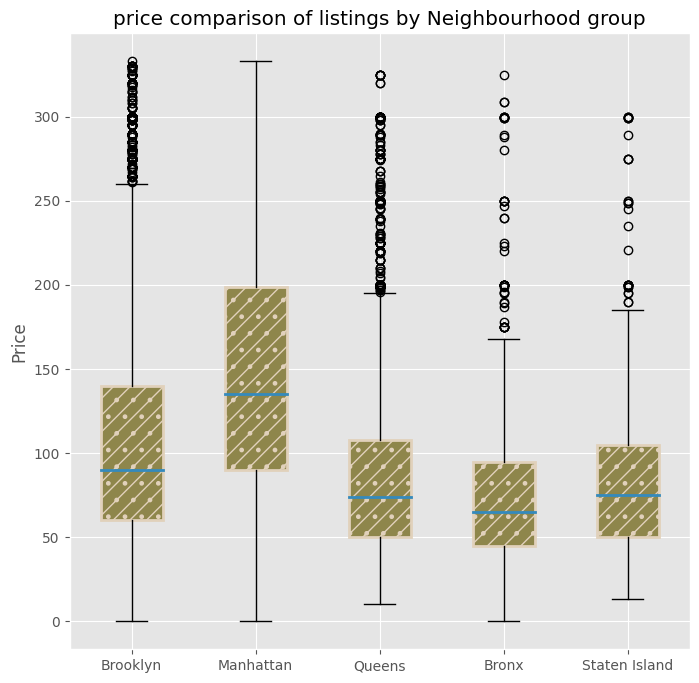

In [266]:
plt.figure(figsize=(8,8), dpi=100)

Brooklyn = df_iqr_transformed.loc[df_iqr_transformed.neighbourhood_group == "Brooklyn"]['price']
Manhattan = df_iqr_transformed.loc[df_iqr_transformed.neighbourhood_group == "Manhattan"]['price']
Queens = df_iqr_transformed.loc[df_iqr_transformed.neighbourhood_group == "Queens"]['price']
Bronx = df_iqr_transformed.loc[df_iqr_transformed.neighbourhood_group == "Bronx"]['price']
Staten_island =df_iqr_transformed.loc[df_iqr_transformed.neighbourhood_group == "Staten Island"]['price']

labels = ["Brooklyn", "Manhattan", "Queens", "Bronx", "Staten Island"]
          
bp = plt.boxplot([Brooklyn, Manhattan, Queens, Bronx, Staten_island],
                 labels= labels, 
                 patch_artist=True, 
                 medianprops={'linewidth': 2})

plt.title('price comparison of listings by Neighbourhood group')
plt.ylabel('Price')

for box in bp['boxes']:
    # change outline color
    box.set(color='#e1d1bb', linewidth=2)
    # change fill color
    box.set(facecolor = '#8e864b' )
    # change hatch
    box.set(hatch = '/./')
    
plt.show()

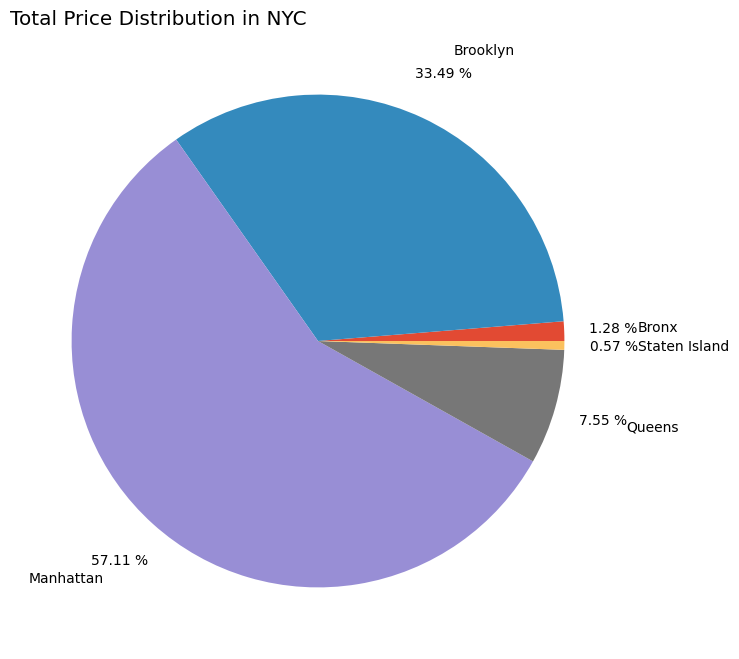

In [221]:
plt.figure(figsize=(8,8), dpi=100)

df_PriceByNeighbourhoodGruop = df.groupby(
                                ['neighbourhood_group'])['price'] \
                                .sum() \
                                .reset_index(name='Total_price')

plt.pie(df_PriceByNeighbourhoodGruop['Total_price'],
        labels = df_PriceByNeighbourhoodGruop['neighbourhood_group'],
        pctdistance=1.2,
        labeldistance=1.3,
        autopct='%.2f %%')

plt.title('Total Price Distribution in NYC', loc="left")

plt.show()

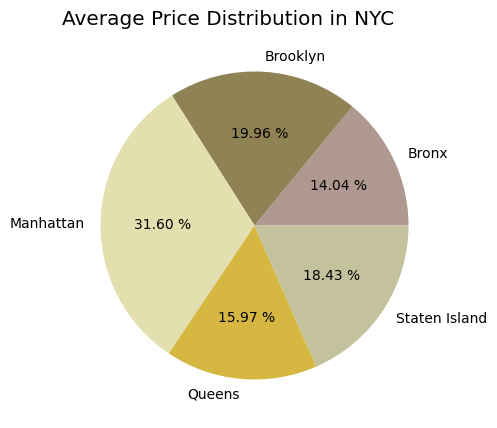

In [278]:
plt.figure(figsize=(8,5), dpi=100)

df_PriceByNeighbourhoodGruop = df.groupby(
                                ['neighbourhood_group'])['price'] \
                                .mean() \
                                .reset_index(name='Total_price')

colors=["#AE9890", "#8F8255","#E4DFAF", "#D5B741",  "#C3C29C"]
plt.pie(df_PriceByNeighbourhoodGruop['Total_price'],
        labels = df_PriceByNeighbourhoodGruop['neighbourhood_group'],
        autopct='%.2f %%',
       colors=colors)

plt.title('Average Price Distribution in NYC', loc="left")

plt.show()

In [226]:
corr = df_iqr_transformed[['price',  
                           'minimum_nights', 
                           'number_of_reviews', 
                           'reviews_per_month', 
                           'calculated_host_listings_count', 
                           'availability_365']].corr()

corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.031141,-0.027547,-0.035338,0.172891,0.066179
minimum_nights,0.031141,1.000000,-0.082851,-0.122758,0.133237,0.146329
number_of_reviews,-0.027547,-0.082851,1.000000,0.556406,-0.070357,0.183707
reviews_per_month,-0.035338,-0.122758,0.556406,1.000000,-0.017054,0.189891
calculated_host_listings_count,0.172891,0.133237,-0.070357,-0.017054,1.000000,0.225251
availability_365,0.066179,0.146329,0.183707,0.189891,0.225251,1.000000


<AxesSubplot: >

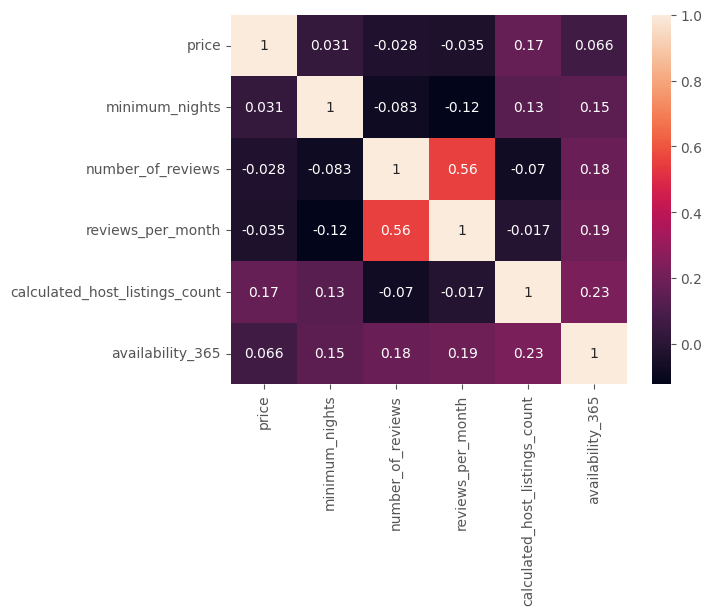

In [227]:
sns.heatmap(corr, annot=True)

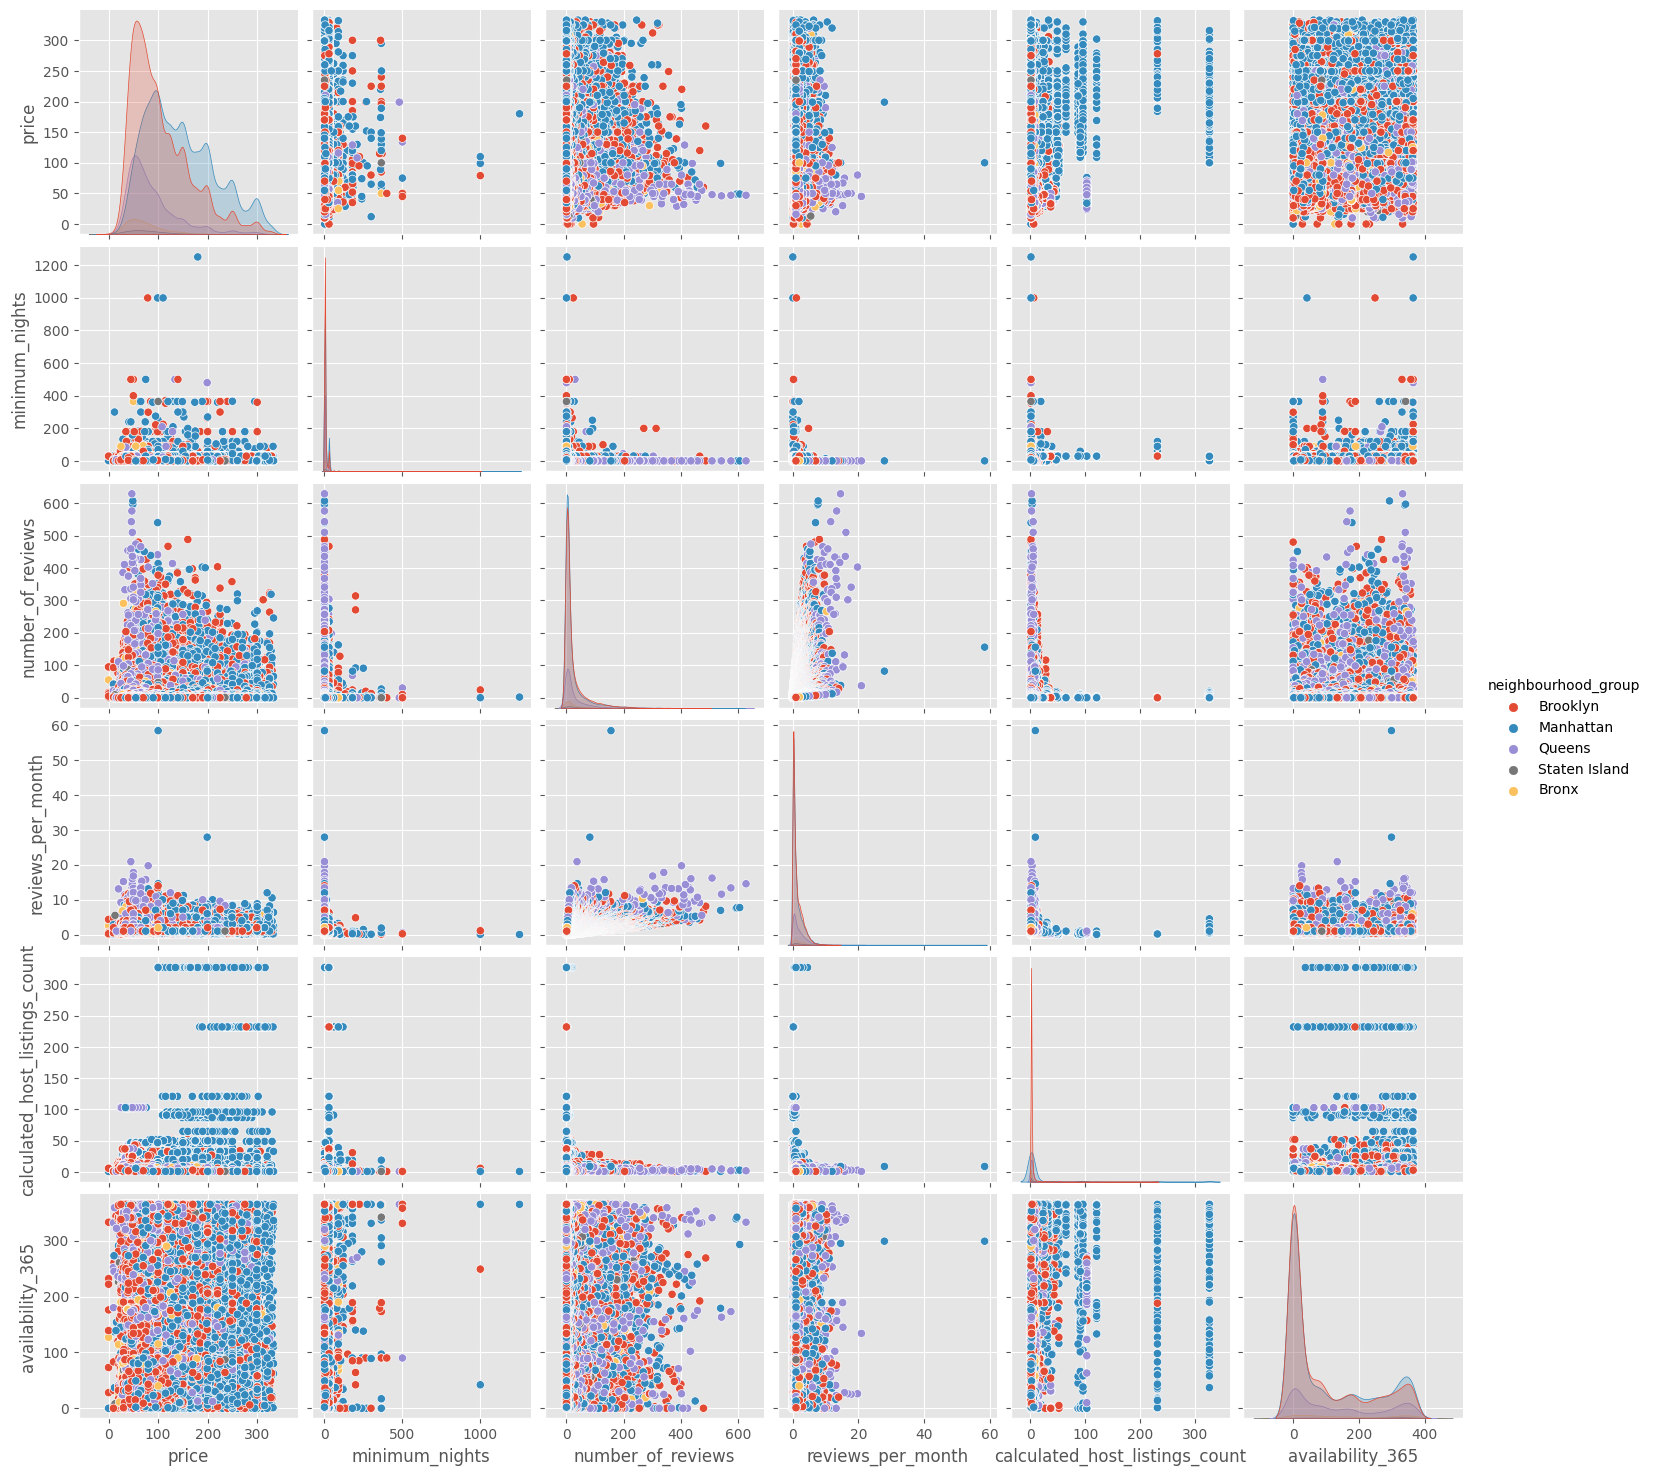

In [229]:
sns.pairplot(df_iqr_transformed, vars=['price',  
                           'minimum_nights', 
                           'number_of_reviews', 
                           'reviews_per_month', 
                           'calculated_host_listings_count', 
                           'availability_365'],
            hue='neighbourhood_group')
plt.show()

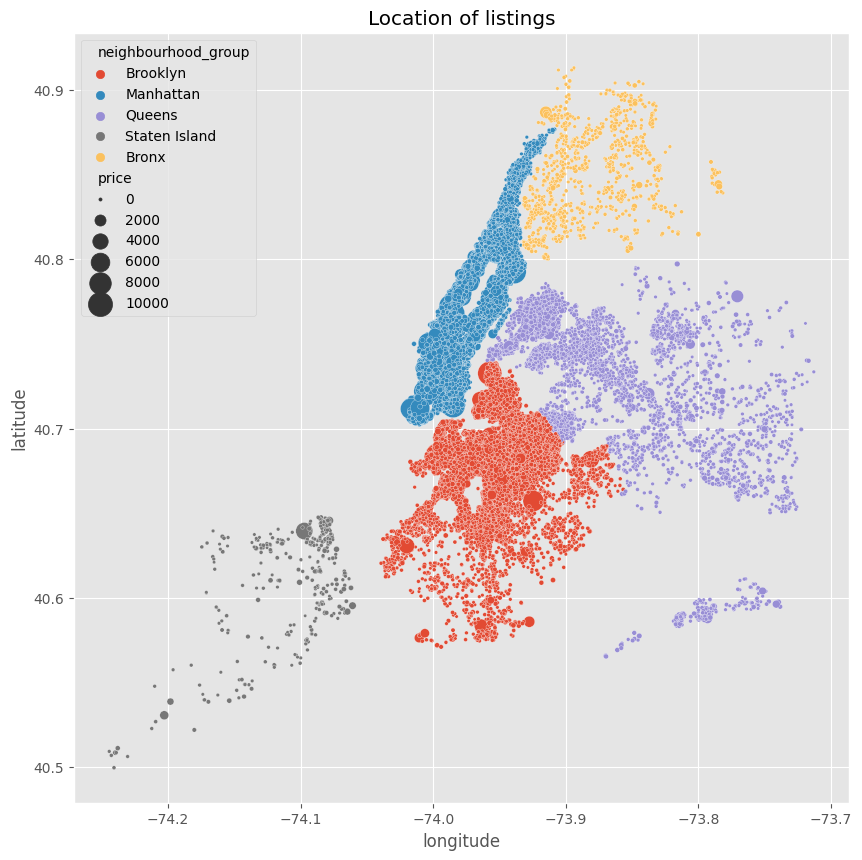

In [246]:
plt.figure(figsize=(10,10), dpi=100)
sns.scatterplot(x="longitude", 
                y="latitude", 
                hue="neighbourhood_group", 
                size="price",
                sizes=(5,300),
                data=df)
# Add labels and title
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("Location of listings")

# Show plot
plt.show()